In [1]:
# @title Подключение к диску с данными
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title Импорт библиотек и настройка стиля
import polars as pl
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Настройка визуального стиля
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)
base_path = '/content/drive/MyDrive/ml-vtb-data-fusion-strazh/data/'


In [ ]:
# @title Функция сбора статистики из файла
def process_file(file_path, description, log_file):
    """
    Reads a file (parquet or csv), prints and logs its stats.
    """
    display(Markdown(f"### Processing: {description}"))

    try:
        if file_path.endswith('.parquet'):
            df = pl.read_parquet(file_path)
        elif file_path.endswith('.csv'):
            df = pl.read_csv(file_path)
        else:
            print(f"Unsupported file format: {file_path}")
            return

        # Prepare output string for file
        output_buffer = []
        output_buffer.append(f"Данные из файла {description}")

        desc = df.describe()
        output_buffer.append(str(desc))

        head = df.head()
        output_buffer.append(str(head))

        type_cols = []
        for col in df.columns:
            type_cols.append(f"{col:25} → dtype: {df[col].dtype}")
        output_buffer.append("\n".join(type_cols))

        # Visual Output in Notebook
        print(f"Shape: {df.shape}")

        display(Markdown("**Первые 5 строк:**"))
        display(head)

        display(Markdown("**Статистика:**"))
        display(desc)

        display(Markdown("**Типы данных:**"))
        for col in df.columns:
             print(f"{col:25} → dtype: {df[col].dtype}")

        # Write to file
        log_file.write("\n".join(output_buffer) + "\n" + "-"*50 + "\n")

        # Clean up
        del df

    except Exception as e:
        print(f"Error processing {description}: {e}")

In [ ]:
# @title Просмотр данных из файлов соревнования
base_path = '/content/drive/MyDrive/ml-vtb-data-fusion-strazh/data/'
files_to_process = [
    ('pretrain_part_1.parquet', 'pretrain_part_1'),
    ('train_part_1.parquet', 'train_part_1'),
    ('train_labels.parquet', 'train_labels'),
    ('sample_submit.csv', 'sample_submit'),
    ("pretest.parquet","pretest"),
    ("test.parquet", "test")
]

with open("/content/info.txt", "w") as f:
    for filename, desc in files_to_process:
        full_path = os.path.join(base_path, filename)
        process_file(full_path, desc, f)

print("Done processing all files.")


### Processing: pretrain_part_1

Shape: (30329960, 23)


**Первые 5 строк:**

customer_id,event_id,event_dttm,event_type_nm,event_desc,channel_indicator_type,channel_indicator_sub_type,operaton_amt,currency_iso_cd,mcc_code,pos_cd,accept_language,browser_language,timezone,session_id,operating_system_type,battery,device_system_version,screen_size,developer_tools,phone_voip_call_state,web_rdp_connection,compromised
i64,i64,str,i32,i32,i32,i32,f64,i32,str,i32,str,str,i32,i32,i32,str,str,str,str,i32,i32,str
123123123123129,123251972261925,"""2023-10-01 09:16:41""",7,56,4,15,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,125193298164858,"""2023-10-01 11:13:48""",14,75,6,5,71085.0,0,"""15""",8,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,124823932244729,"""2023-10-01 11:40:35""",14,75,6,5,36158.0,0,"""14""",8,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,124454563399321,"""2023-10-01 16:37:32""",14,75,6,5,81971.0,0,"""4""",8,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,126490377886229,"""2023-10-02 19:28:25""",7,56,4,15,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


**Статистика:**

statistic,customer_id,event_id,event_dttm,event_type_nm,event_desc,channel_indicator_type,channel_indicator_sub_type,operaton_amt,currency_iso_cd,mcc_code,pos_cd,accept_language,browser_language,timezone,session_id,operating_system_type,battery,device_system_version,screen_size,developer_tools,phone_voip_call_state,web_rdp_connection,compromised
str,f64,f64,str,f64,f64,f64,f64,f64,f64,str,f64,str,str,f64,f64,f64,str,str,str,str,f64,f64,str
"""count""",3.032996e7,3.032996e7,"""30329960""",3.032996e7,3.032996e7,3.032996e7,3.032996e7,1.770371e7,1.8251042e7,"""10622044""",1.0169066e7,"""4883359""","""0""",4.523111e6,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,"""0"""
"""null_count""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0,1.262625e7,1.2078918e7,"""19707916""",2.0160894e7,"""25446601""","""30329960""",2.5806849e7,3.032996e7,3.032996e7,"""30329960""","""30329960""","""30329960""","""30329960""",3.032996e7,3.032996e7,"""30329960"""
"""mean""",1.2331e14,1.2484e14,null,10.305956,62.573488,4.494905,9.323161,1.5894e6,0.00495,null,4.639812,null,null,219.391196,null,null,null,null,null,null,null,null,null
"""std""",1.1081e11,9.9193e11,null,3.581688,19.132414,1.232021,5.302776,7.9232e7,0.187304,null,2.977957,null,null,420.787666,null,null,null,null,null,null,null,null,null
"""min""",1.2312e14,1.2312e14,"""2023-10-01 00:00:12""",0.0,0.0,1.0,1.0,0.0,0.0,"""0""",0.0,"""*""",null,0.0,null,null,null,null,null,null,null,null,null
"""25%""",1.2322e14,1.2397e14,null,7.0,56.0,4.0,5.0,21134.0,0.0,null,3.0,null,null,31.0,null,null,null,null,null,null,null,null,null
"""50%""",1.2331e14,1.2484e14,null,9.0,56.0,4.0,5.0,60720.0,0.0,null,3.0,null,null,57.0,null,null,null,null,null,null,null,null,null
"""75%""",1.2341e14,1.2570e14,null,14.0,75.0,6.0,15.0,223500.0,0.0,null,8.0,null,null,121.0,null,null,null,null,null,null,null,null,null
"""max""",1.2350e14,1.2655e14,"""2024-09-30 23:59:53""",16.0,169.0,6.0,22.0,1.9956e11,28.0,"""9""",29.0,"""zh-cn""",null,10006.0,null,null,null,null,null,null,null,null,null


**Типы данных:**

customer_id               → dtype: Int64
event_id                  → dtype: Int64
event_dttm                → dtype: String
event_type_nm             → dtype: Int32
event_desc                → dtype: Int32
channel_indicator_type    → dtype: Int32
channel_indicator_sub_type → dtype: Int32
operaton_amt              → dtype: Float64
currency_iso_cd           → dtype: Int32
mcc_code                  → dtype: String
pos_cd                    → dtype: Int32
accept_language           → dtype: String
browser_language          → dtype: String
timezone                  → dtype: Int32
session_id                → dtype: Int32
operating_system_type     → dtype: Int32
battery                   → dtype: String
device_system_version     → dtype: String
screen_size               → dtype: String
developer_tools           → dtype: String
phone_voip_call_state     → dtype: Int32
web_rdp_connection        → dtype: Int32
compromised               → dtype: String


### Processing: train_part_1

Shape: (28618594, 23)


**Первые 5 строк:**

customer_id,event_id,event_dttm,event_type_nm,event_desc,channel_indicator_type,channel_indicator_sub_type,operaton_amt,currency_iso_cd,mcc_code,pos_cd,accept_language,browser_language,timezone,session_id,operating_system_type,battery,device_system_version,screen_size,developer_tools,phone_voip_call_state,web_rdp_connection,compromised
i64,i64,str,i32,i32,i32,i32,f64,i32,str,i32,str,str,i32,i64,i32,str,str,str,str,i32,i32,str
123123123123129,123999300382879,"""2024-10-01 05:29:14""",14,75,6,5,56422.0,0,"""4""",3,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,124531875713936,"""2024-10-01 10:17:22""",7,56,4,15,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,123329285580171,"""2024-10-01 10:20:03""",3,120,6,5,300870.0,0,"""10""",3,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,124334305430665,"""2024-10-02 07:48:09""",14,75,6,5,298458.0,0,"""1""",3,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,126215501146513,"""2024-10-02 11:20:40""",14,75,6,5,59944.0,0,"""15""",3,null,null,null,null,null,null,null,null,null,null,null,null


**Статистика:**

statistic,customer_id,event_id,event_dttm,event_type_nm,event_desc,channel_indicator_type,channel_indicator_sub_type,operaton_amt,currency_iso_cd,mcc_code,pos_cd,accept_language,browser_language,timezone,session_id,operating_system_type,battery,device_system_version,screen_size,developer_tools,phone_voip_call_state,web_rdp_connection,compromised
str,f64,f64,str,f64,f64,f64,f64,f64,f64,str,f64,str,str,f64,f64,f64,str,str,str,str,f64,f64,str
"""count""",2.8618594e7,2.8618594e7,"""28618594""",2.8618594e7,2.8618594e7,2.8618594e7,2.8618594e7,1.5265227e7,1.5621644e7,"""8178500""",2.483914e6,"""3165772""","""2650384""",2.750701e6,1.7217611e7,2.701158e6,"""2650384""","""9571791""","""9563295""","""8729726""",5.979011e6,4.563025e6,"""12945155"""
"""null_count""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0,1.3353367e7,1.299695e7,"""20440094""",2.613468e7,"""25452822""","""25968210""",2.5867893e7,1.1400983e7,2.5917436e7,"""25968210""","""19046803""","""19055299""","""19888868""",2.2639583e7,2.4055569e7,"""15673439"""
"""mean""",1.2331e14,1.2484e14,null,10.042456,61.796806,2.627383,10.056216,2.4512e6,0.007763,null,2.694526,null,null,26.273639,1.2484e14,6.004491,null,null,null,null,0.005025,0.039072,null
"""std""",1.1081e11,9.9186e11,null,3.462653,18.409673,1.764192,5.189096,2.1265e8,0.23767,null,1.930288,null,null,11.681092,9.9187e11,0.899631,null,null,null,null,0.070709,0.193767,null
"""min""",1.2312e14,1.2312e14,"""2024-10-01 00:00:05""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,"""*""",""":not available,iframed:false,i…",0.0,1.2312e14,0.0,"""0%""","""10""","""1008x2023""","""0""",0.0,0.0,"""0"""
"""25%""",1.2322e14,1.2397e14,null,7.0,56.0,0.0,5.0,24019.0,0.0,null,1.0,null,null,21.0,1.2398e14,6.0,null,null,null,null,0.0,0.0,null
"""50%""",1.2331e14,1.2483e14,null,8.0,56.0,4.0,14.0,71252.0,0.0,null,3.0,null,null,31.0,1.2484e14,6.0,null,null,null,null,0.0,0.0,null
"""75%""",1.2341e14,1.2569e14,null,14.0,75.0,4.0,15.0,278096.0,0.0,null,3.0,null,null,31.0,1.2570e14,6.0,null,null,null,null,0.0,0.0,null
"""max""",1.2350e14,1.2655e14,"""2025-05-31 23:59:56""",16.0,163.0,6.0,16.0,2.7685e11,24.0,"""9""",23.0,"""zh-tw""","""not available""",8059.0,1.2655e14,10.0,"""not available""","""9.0""","""992x2434""","""1""",1.0,1.0,"""1"""


**Типы данных:**

customer_id               → dtype: Int64
event_id                  → dtype: Int64
event_dttm                → dtype: String
event_type_nm             → dtype: Int32
event_desc                → dtype: Int32
channel_indicator_type    → dtype: Int32
channel_indicator_sub_type → dtype: Int32
operaton_amt              → dtype: Float64
currency_iso_cd           → dtype: Int32
mcc_code                  → dtype: String
pos_cd                    → dtype: Int32
accept_language           → dtype: String
browser_language          → dtype: String
timezone                  → dtype: Int32
session_id                → dtype: Int64
operating_system_type     → dtype: Int32
battery                   → dtype: String
device_system_version     → dtype: String
screen_size               → dtype: String
developer_tools           → dtype: String
phone_voip_call_state     → dtype: Int32
web_rdp_connection        → dtype: Int32
compromised               → dtype: String


### Processing: train_labels

Shape: (87514, 3)


**Первые 5 строк:**

customer_id,event_id,target
i64,i64,i32
123123123123129,124093788813382,0
123123123123138,126035112904381,0
123123123123169,124325714018852,1
123123123123169,124944191029616,1
123123123123169,126395888234936,1


**Статистика:**

statistic,customer_id,event_id,target
str,f64,f64,f64
"""count""",87514.0,87514.0,87514.0
"""null_count""",0.0,0.0,0.0
"""mean""",1.2369e14,1.2484e14,0.587769
"""std""",3.2936e11,9.8833e11,0.492239
"""min""",1.2312e14,1.2312e14,0.0
"""25%""",1.2341e14,1.2398e14,0.0
"""50%""",1.2369e14,1.2484e14,1.0
"""75%""",1.2397e14,1.2569e14,1.0
"""max""",1.2427e14,1.2655e14,1.0


**Типы данных:**

customer_id               → dtype: Int64
event_id                  → dtype: Int64
target                    → dtype: Int32


### Processing: sample_submit

Shape: (633683, 2)


**Первые 5 строк:**

event_id,predict
i64,f64
125854726334416,-0.984226
125949211749418,-1.14122
124437385134670,-0.869487
124394437682654,-0.869487
123973531121838,-1.039899


**Статистика:**

statistic,event_id,predict
str,f64,f64
"""count""",633683.0,633683.0
"""null_count""",0.0,0.0
"""mean""",1.2484e14,-0.752115
"""std""",9.9171e11,0.532899
"""min""",1.2312e14,-1.738132
"""25%""",1.2398e14,-1.051389
"""50%""",1.2484e14,-0.869487
"""75%""",1.2570e14,-0.596076
"""max""",1.2655e14,2.377163


**Типы данных:**

event_id                  → dtype: Int64
predict                   → dtype: Float64


### Processing: pretest

Shape: (14202075, 23)


**Первые 5 строк:**

customer_id,event_id,event_dttm,event_type_nm,event_desc,channel_indicator_type,channel_indicator_sub_type,operaton_amt,currency_iso_cd,mcc_code,pos_cd,accept_language,browser_language,timezone,session_id,operating_system_type,battery,device_system_version,screen_size,developer_tools,phone_voip_call_state,web_rdp_connection,compromised
i64,i64,str,i32,i32,i32,i32,f64,i32,str,i32,str,str,i32,i64,i32,str,str,str,str,i32,i32,str
123123123123129,125528307857825,"""2025-06-01 06:13:44""",14,75,0,5,14952.0,0,"""15""",null,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,126507561221927,"""2025-06-01 09:35:33""",14,75,0,5,14901.0,0,"""15""",null,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,123612751983071,"""2025-06-01 18:25:12""",14,75,0,5,77855.0,0,"""4""",null,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,123372233729630,"""2025-06-02 06:10:43""",14,75,0,5,15045.0,0,"""15""",null,null,null,null,null,null,null,null,null,null,null,null,null
123123123123129,123672881410894,"""2025-06-02 09:32:58""",14,75,0,5,10048.0,0,"""15""",null,null,null,null,null,null,null,null,null,null,null,null,null


**Статистика:**

statistic,customer_id,event_id,event_dttm,event_type_nm,event_desc,channel_indicator_type,channel_indicator_sub_type,operaton_amt,currency_iso_cd,mcc_code,pos_cd,accept_language,browser_language,timezone,session_id,operating_system_type,battery,device_system_version,screen_size,developer_tools,phone_voip_call_state,web_rdp_connection,compromised
str,f64,f64,str,f64,f64,f64,f64,f64,f64,str,f64,str,str,f64,f64,f64,str,str,str,str,f64,f64,str
"""count""",1.4202075e7,1.4202075e7,"""14202075""",1.4202075e7,1.4202075e7,1.4202075e7,1.4202075e7,7.194623e6,7.346662e6,"""3936846""",904365.0,"""1427261""","""1179170""",1.190003e6,9.071327e6,1.190003e6,"""1179170""","""7547735""","""7545530""","""6906948""",6.051336e6,1.39284e6,"""7540175"""
"""null_count""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0,7.007452e6,6.855413e6,"""10265229""",1.329771e7,"""12774814""","""13022905""",1.3012072e7,5.130748e6,1.3012072e7,"""13022905""","""6654340""","""6656545""","""7295127""",8.150739e6,1.2809235e7,"""6661900"""
"""mean""",1.2369e14,1.2484e14,null,9.940094,63.425869,2.647103,10.522771,1.7866e6,0.007559,null,2.862684,null,null,26.027693,1.2484e14,5.995654,null,null,null,null,0.004487,0.058247,null
"""std""",3.2909e11,9.9182e11,null,3.424569,20.057301,1.766693,5.270085,1.0087e8,0.229447,null,2.371489,null,null,9.964305,9.9196e11,0.856098,null,null,null,null,0.066834,0.23421,null
"""min""",1.2312e14,1.2312e14,"""2025-06-01 00:00:03""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,"""*""","""not available""",0.0,1.2312e14,0.0,"""0%""","""10""","""1008x2013""","""0""",0.0,0.0,"""0"""
"""25%""",1.2341e14,1.2398e14,null,7.0,56.0,0.0,5.0,23777.0,0.0,null,1.0,null,null,21.0,1.2398e14,6.0,null,null,null,null,0.0,0.0,null
"""50%""",1.2369e14,1.2484e14,null,8.0,56.0,4.0,15.0,69370.0,0.0,null,3.0,null,null,31.0,1.2484e14,6.0,null,null,null,null,0.0,0.0,null
"""75%""",1.2397e14,1.2570e14,null,14.0,75.0,4.0,15.0,249875.0,0.0,null,3.0,null,null,31.0,1.2570e14,6.0,null,null,null,null,0.0,0.0,null
"""max""",1.2427e14,1.2655e14,"""2025-08-08 23:59:50""",16.0,164.0,5.0,16.0,1.1878e11,21.0,"""9""",18.0,"""zh-tw""","""not available""",4727.0,1.2655e14,9.0,"""not available""","""9.0""","""992x2434""","""1""",1.0,1.0,"""4"""


**Типы данных:**

customer_id               → dtype: Int64
event_id                  → dtype: Int64
event_dttm                → dtype: String
event_type_nm             → dtype: Int32
event_desc                → dtype: Int32
channel_indicator_type    → dtype: Int32
channel_indicator_sub_type → dtype: Int32
operaton_amt              → dtype: Float64
currency_iso_cd           → dtype: Int32
mcc_code                  → dtype: String
pos_cd                    → dtype: Int32
accept_language           → dtype: String
browser_language          → dtype: String
timezone                  → dtype: Int32
session_id                → dtype: Int64
operating_system_type     → dtype: Int32
battery                   → dtype: String
device_system_version     → dtype: String
screen_size               → dtype: String
developer_tools           → dtype: String
phone_voip_call_state     → dtype: Int32
web_rdp_connection        → dtype: Int32
compromised               → dtype: String


### Processing: test

Shape: (633683, 23)


**Первые 5 строк:**

customer_id,event_id,event_dttm,event_type_nm,event_desc,channel_indicator_type,channel_indicator_sub_type,operaton_amt,currency_iso_cd,mcc_code,pos_cd,accept_language,browser_language,timezone,session_id,operating_system_type,battery,device_system_version,screen_size,developer_tools,phone_voip_call_state,web_rdp_connection,compromised
i64,i64,str,i32,i32,i32,i32,f64,i32,str,i32,str,str,i32,i64,i32,str,str,str,str,i32,i32,str
123123123123129,123707242230467,"""2025-07-27 14:55:11""",8,122,2,0,null,null,null,null,null,null,null,125597024902696,null,null,null,null,null,null,null,null
123123123123129,123234793229123,"""2025-07-27 14:55:20""",14,42,4,15,247750.0,0,null,null,null,null,null,125597024902696,null,null,"""13""","""1080x2180""","""0""",0,null,"""0"""
123123123123129,125837545055907,"""2025-07-27 14:55:28""",7,56,4,15,null,null,null,null,null,null,null,125828952579121,null,null,"""13""","""1080x2180""","""0""",0,null,"""0"""
123123123123129,126456020999239,"""2025-07-27 14:56:28""",7,56,4,15,null,null,null,null,null,null,null,125597024902696,null,null,"""13""","""1080x2180""","""0""",0,null,"""0"""
123123123123130,125090221587312,"""2025-07-09 06:42:00""",8,86,4,15,496350.0,0,null,null,null,null,null,125605614487041,null,null,"""12""","""720x1507""","""0""",0,null,"""0"""


**Статистика:**

statistic,customer_id,event_id,event_dttm,event_type_nm,event_desc,channel_indicator_type,channel_indicator_sub_type,operaton_amt,currency_iso_cd,mcc_code,pos_cd,accept_language,browser_language,timezone,session_id,operating_system_type,battery,device_system_version,screen_size,developer_tools,phone_voip_call_state,web_rdp_connection,compromised
str,f64,f64,str,f64,f64,f64,f64,f64,f64,str,f64,str,str,f64,f64,f64,str,str,str,str,f64,f64,str
"""count""",633683.0,633683.0,"""633683""",633683.0,633683.0,633683.0,633683.0,293202.0,301466.0,"""154227""",42205.0,"""63501""","""53907""",54554.0,420464.0,54554.0,"""53907""","""343835""","""343736""","""317211""",280296.0,65176.0,"""343475"""
"""null_count""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0,340481.0,332217.0,"""479456""",591478.0,"""570182""","""579776""",579129.0,213219.0,579129.0,"""579776""","""289848""","""289947""","""316472""",353387.0,568507.0,"""290208"""
"""mean""",1.2369e14,1.2484e14,null,9.654217,63.75997,2.74373,10.574644,2.3283e6,0.009218,null,2.827485,null,null,26.070316,1.2484e14,5.962643,null,null,null,null,0.019679,0.05324,null
"""std""",3.2978e11,9.9171e11,null,3.388822,21.126465,1.705452,5.378561,8.9090e7,0.253268,null,2.487429,null,null,8.965561,9.9121e11,0.920679,null,null,null,null,0.138896,0.224514,null
"""min""",1.2312e14,1.2312e14,"""2025-06-01 00:00:13""",0.0,1.0,0.0,0.0,0.0,0.0,"""0""",0.0,"""*""","""not available""",0.0,1.2312e14,0.0,"""0%""","""10""","""1008x2023""","""0""",0.0,0.0,"""0"""
"""25%""",1.2341e14,1.2398e14,null,7.0,56.0,0.0,5.0,25620.0,0.0,null,1.0,null,null,21.0,1.2398e14,6.0,null,null,null,null,0.0,0.0,null
"""50%""",1.2369e14,1.2484e14,null,8.0,56.0,4.0,15.0,83732.0,0.0,null,3.0,null,null,31.0,1.2483e14,6.0,null,null,null,null,0.0,0.0,null
"""75%""",1.2397e14,1.2570e14,null,14.0,75.0,4.0,15.0,376428.0,0.0,null,3.0,null,null,31.0,1.2569e14,6.0,null,null,null,null,0.0,0.0,null
"""max""",1.2427e14,1.2655e14,"""2025-08-09 23:58:25""",16.0,146.0,5.0,16.0,4.5412e10,15.0,"""9""",14.0,"""zh-cn""","""not available""",98.0,1.2655e14,9.0,"""not available""","""9.0""","""992x2434""","""1""",1.0,1.0,"""5"""


**Типы данных:**

customer_id               → dtype: Int64
event_id                  → dtype: Int64
event_dttm                → dtype: String
event_type_nm             → dtype: Int32
event_desc                → dtype: Int32
channel_indicator_type    → dtype: Int32
channel_indicator_sub_type → dtype: Int32
operaton_amt              → dtype: Float64
currency_iso_cd           → dtype: Int32
mcc_code                  → dtype: String
pos_cd                    → dtype: Int32
accept_language           → dtype: String
browser_language          → dtype: String
timezone                  → dtype: Int32
session_id                → dtype: Int64
operating_system_type     → dtype: Int32
battery                   → dtype: String
device_system_version     → dtype: String
screen_size               → dtype: String
developer_tools           → dtype: String
phone_voip_call_state     → dtype: Int32
web_rdp_connection        → dtype: Int32
compromised               → dtype: String
Done processing all files.


In [6]:
test_path = os.path.join(base_path, 'test.parquet')
sample_submit_path = os.path.join(base_path, 'sample_submit.csv')

# Load test.parquet and count event_id
df_test = pl.read_parquet(test_path)
test_event_ids_count = df_test['event_id'].count()

# Load sample_submit.csv and count event_id
df_sample_submit = pl.read_csv(sample_submit_path)
sample_submit_event_ids_count = df_sample_submit['event_id'].count()

# Calculate the number of common event_ids
common_event_ids_count = df_test.filter(
    pl.col('event_id').is_in(df_sample_submit['event_id'])
).height

print(f"Количество event_id в test.parquet: {test_event_ids_count}")
print(f"Количество event_id в sample_submit.csv: {sample_submit_event_ids_count}")
print(f"Количество общих event_id между test.parquet и sample_submit.csv: {common_event_ids_count}")

Количество event_id в test.parquet: 633683
Количество event_id в sample_submit.csv: 633683
Количество общих event_id между test.parquet и sample_submit.csv: 633683


/tmp/ipython-input-2348195853.py:13: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  common_event_ids_count = df_test.filter(


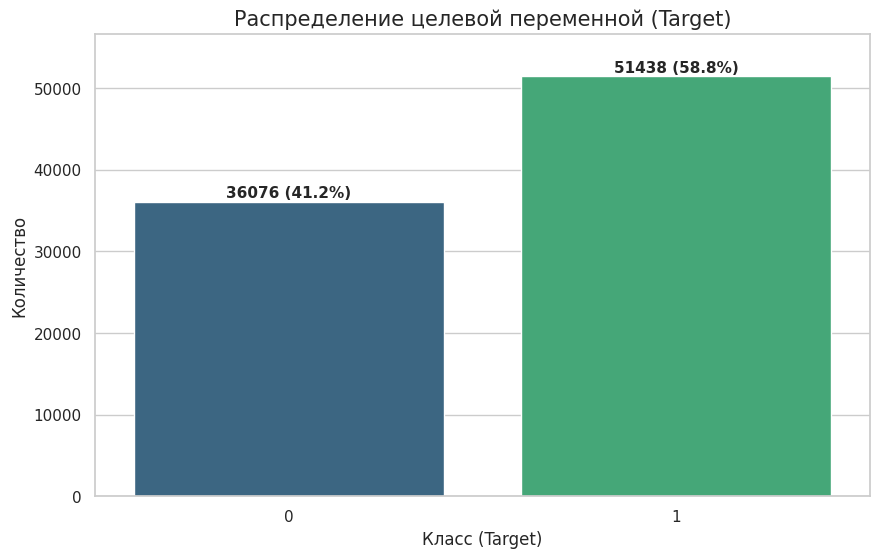

In [ ]:
# @title Визуализация распределения классов в target
# Load the train labels
labels_path = f'{base_path}train_labels.parquet'
df_labels = pl.read_parquet(labels_path)

# Calculate value counts
target_counts = df_labels['target'].value_counts()
target_counts_pd = target_counts.to_pandas().sort_values('target')

# Calculate percentages
total = target_counts_pd['count'].sum()
target_counts_pd['percentage'] = (target_counts_pd['count'] / total) * 100

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=target_counts_pd, x='target', y='count', hue='target', palette='viridis', legend=False)

plt.title('Распределение целевой переменной (Target)', fontsize=15)
plt.xlabel('Класс (Target)', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Add annotations
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = target_counts_pd.iloc[i]['percentage']
    ax.text(p.get_x() + p.get_width() / 2., height + 500,
            f'{int(height)} ({percentage:.1f}%)',
            ha="center", fontsize=11, fontweight='bold')

plt.ylim(0, max(target_counts_pd['count']) * 1.1) # Add some space on top
plt.show()


#Задача

Провести предварительный анализ данных (Exploratory Data Analysis, EDA) для обоснования выбора конструктивных элементов.

##1. Подготовка данных:

* Загрузить метки нагрузки из файла "train_labels.parquet", расположенного по пути "/content/drive/MyDrive/ml-vtb-data-fusion-strazh/сведения/train_labels.parquet".
* Использовать функцию pl.scan_parquet для загрузки данных транзакций из файла "train_part_1.parquet", находящегося по пути "/content/drive/MyDrive/ml-vtb-data-fusion-strazh/data/train_part_1.parquet".
* Выполнить внутреннее объединение (inner join) по идентификатору транзакции (event_id), чтобы получить только помеченные транзакции, и сохранить результат в памяти с помощью функции collect().
* Преобразовать столбец event_dttm в объект типа datetime для последующего анализа временных данных.

##2. Анализ показателей времени и суммы мошенничества:

* Уровень мошенничества по часам: Рассчитать среднее значение целевого показателя (уровень мошенничества) для каждого часа в течение дня.
* Уровень мошенничества по дням недели: Рассчитать среднее значение целевого показателя для каждого дня недели.
* Распределение суммы: Построить график распределения суммы операций (операции_amt), используя логарифмическую шкалу, и дифференцировать данные по целевому показателю (мошенничество vs. законные операции) с помощью Kernel Density Estimate (KDE) или гистограммы.

##3. Анализ факторов риска:

* Флаги устройств: Рассчитать и визуализировать уровень мошенничества для сеансов, помеченных как "скомпрометированные", "developer_tools" и "web_rdp_connection", в сравнении с сеансами без этих меток.
* MCC-риск: Рассчитать уровень мошенничества для каждого MCC-кода. Отфильтровать коды с объемом транзакций более 100 и представить топ-10 самых опасных MCC-кодов для демонстрации эффективности целевого кодирования.

## Подготовка набора аналитических данных

### Подзадача:

Загрузка и объединение данных транзакций с метками для анализа.


In [ ]:
# Define path for transaction data
train_path = os.path.join(base_path, 'train_part_1.parquet')

# Create LazyFrame, join with labels, and collect
# We use inner join to keep only transactions with known targets
df_train = (
    pl.scan_parquet(train_path)
    .join(df_labels.lazy(), on='event_id', how='inner')
    .collect()
)

# Convert event_dttm to datetime
df_train = df_train.with_columns(
    pl.col("event_dttm").str.to_datetime()
)

# Verify the result
print(f"Shape of df_train: {df_train.shape}")
display(df_train.head())

Shape of df_train: (29466, 25)


customer_id,event_id,event_dttm,event_type_nm,event_desc,channel_indicator_type,channel_indicator_sub_type,operaton_amt,currency_iso_cd,mcc_code,pos_cd,accept_language,browser_language,timezone,session_id,operating_system_type,battery,device_system_version,screen_size,developer_tools,phone_voip_call_state,web_rdp_connection,compromised,customer_id_right,target
i64,i64,datetime[μs],i32,i32,i32,i32,f64,i32,str,i32,str,str,i32,i64,i32,str,str,str,str,i32,i32,str,i64,i32
123123123123129,124093788813382,2025-05-22 08:19:56,14,75,0,5,15050.0,0,"""15""",null,null,null,null,null,null,null,null,null,null,null,null,null,123123123123129,0
123123123123138,126035112904381,2025-04-23 02:25:13,7,56,4,15,null,null,null,null,null,null,null,126473198071196,null,null,"""13""","""720x1436""","""0""",0,null,"""0""",123123123123138,0
123123123123169,124325714018852,2025-05-14 12:36:23,9,37,4,14,9.89703e7,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,123123123123169,1
123123123123169,124944191029616,2025-05-14 13:23:49,4,77,4,15,null,null,null,null,null,null,null,null,null,null,"""13""","""1080x2158""","""0""",1,null,"""0""",123123123123169,1
123123123123169,126395888234936,2025-05-14 13:38:53,2,88,0,5,null,0,"""10""",3,null,null,null,null,null,null,null,null,null,null,null,null,123123123123169,1


##Подзадача: Анализ временных и количественных характеристик

###Инструкции

1. Извлечение характеристик: Необходимо извлечь временные компоненты час и день недели из столбца event_dttm для дальнейшего анализа.
2. Агрегирование данных: Требуется вычислить среднее значение целевого показателя (индекса мошенничества) для каждого часа и каждого дня недели.
3. Визуализация данных:
* Построить график, отображающий частоту случаев мошенничества по часам.
* Создать график, демонстрирующий частоту случаев мошенничества по дням недели.
* Построить график распределения значений "operation_amt" (с использованием логарифмической шкалы) в зависимости от целей.

**Рассуждения**:

На основании временной метки будут извлечены характеристики часов и дней недели. Затем будет проведен анализ уровня мошенничества с учетом этих временных компонентов. Результаты будут визуализированы в виде часового тренда, недельного тренда и распределения суммы транзакции. Целью данного анализа является выявление закономерностей.


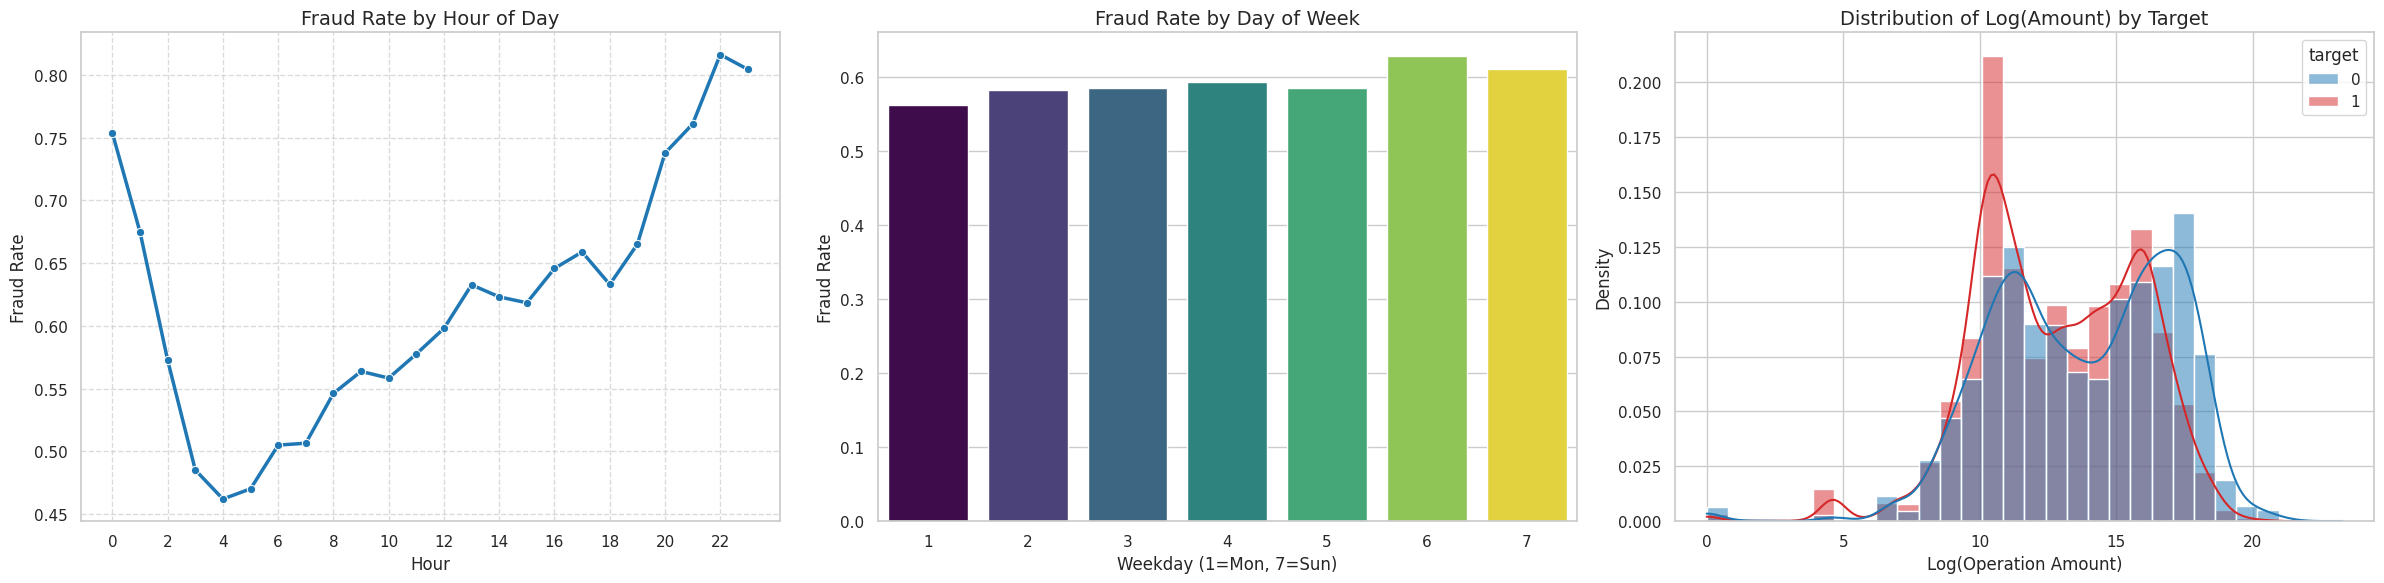

Hourly Fraud Rate (Head):


hour,fraud_rate
i8,f64
0,0.753521
1,0.674757
2,0.572707
3,0.485294
4,0.462151


In [ ]:
import numpy as np

# 1. Feature Extraction
# Extract hour and weekday from event_dttm
df_train = df_train.with_columns([
    pl.col("event_dttm").dt.hour().alias("hour"),
    pl.col("event_dttm").dt.weekday().alias("weekday")
])

# 2. Aggregation
# Hourly Fraud Rate
hourly_fraud = (
    df_train.group_by("hour")
    .agg(pl.col("target").mean().alias("fraud_rate"))
    .sort("hour")
)

# Weekday Fraud Rate
daily_fraud = (
    df_train.group_by("weekday")
    .agg(pl.col("target").mean().alias("fraud_rate"))
    .sort("weekday")
)

# 3. Visualization
# Convert to pandas for plotting (dataset is small enough)
pdf_hourly = hourly_fraud.to_pandas()
pdf_daily = daily_fraud.to_pandas()
# Select only necessary columns for amount plot to save memory if dataset was larger
pdf_amount = df_train.select(["target", "operaton_amt"]).to_pandas()

# Setup plots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot 1: Fraud Rate by Hour
sns.lineplot(data=pdf_hourly, x='hour', y='fraud_rate', ax=axes[0], marker='o', linewidth=2.5, color='tab:blue')
axes[0].set_title('Fraud Rate by Hour of Day', fontsize=14)
axes[0].set_ylabel('Fraud Rate', fontsize=12)
axes[0].set_xlabel('Hour', fontsize=12)
axes[0].set_xticks(range(0, 24, 2))
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot 2: Fraud Rate by Weekday
sns.barplot(data=pdf_daily, x='weekday', y='fraud_rate', ax=axes[1], palette='viridis', hue='weekday', legend=False)
axes[1].set_title('Fraud Rate by Day of Week', fontsize=14)
axes[1].set_ylabel('Fraud Rate', fontsize=12)
axes[1].set_xlabel('Weekday (1=Mon, 7=Sun)', fontsize=12)

# Plot 3: Amount Distribution (Log Scale)
# Log transform for better visualization of skewed amount data
pdf_amount['log_amount'] = np.log1p(pdf_amount['operaton_amt'])

sns.histplot(data=pdf_amount, x='log_amount', hue='target', kde=True, ax=axes[2],
             common_norm=False, stat='density', palette={0: 'tab:blue', 1: 'tab:red'}, bins=30)
axes[2].set_title('Distribution of Log(Amount) by Target', fontsize=14)
axes[2].set_xlabel('Log(Operation Amount)', fontsize=12)

plt.tight_layout()
plt.show()

# Display aggregated stats
print("Hourly Fraud Rate (Head):")
display(hourly_fraud.head())

##Анализ рисков, связанных с устройствами

###Подзадача:

Исследование влияния идентификационных признаков устройств и MCC-кодов на вероятность совершения мошеннических действий.


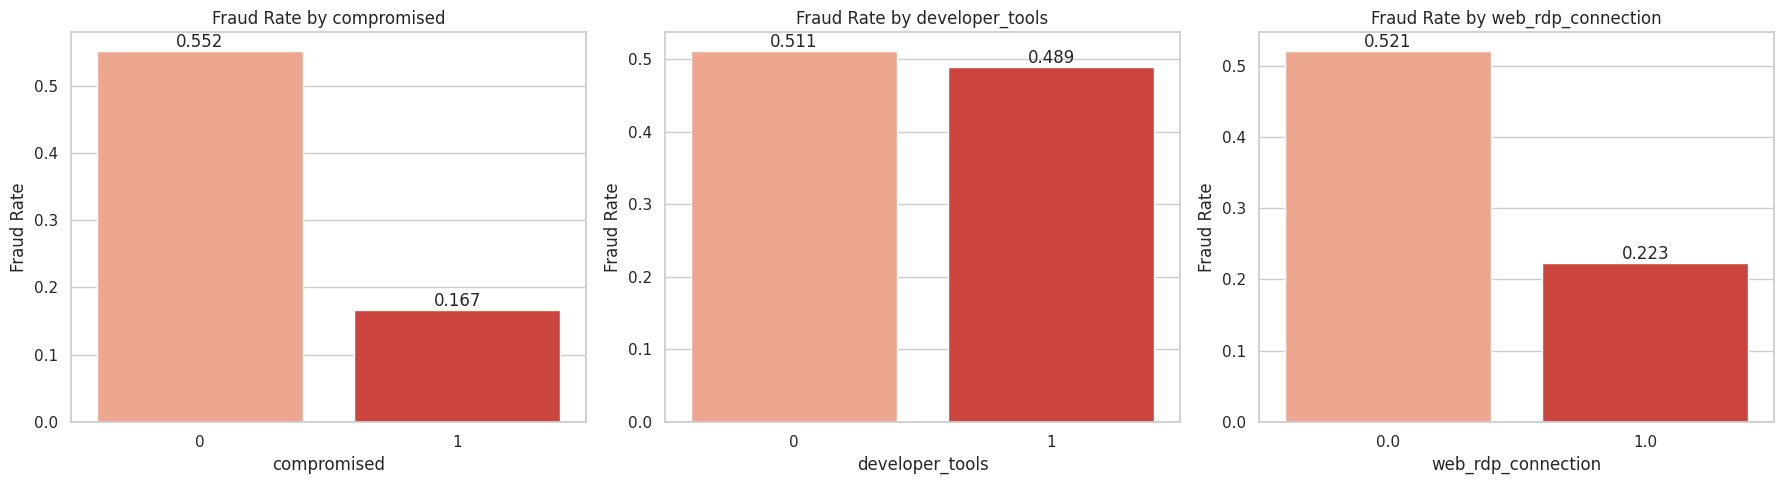

Top 10 Riskiest MCC Codes:


mcc_code,count,fraud_rate
str,u32,f64
"""16""",1379,0.984772
"""3""",300,0.96
"""19""",389,0.843188
"""18""",175,0.811429
"""10""",2798,0.653324
"""14""",160,0.65
"""15""",376,0.56383
null,21684,0.556124
"""17""",310,0.535484


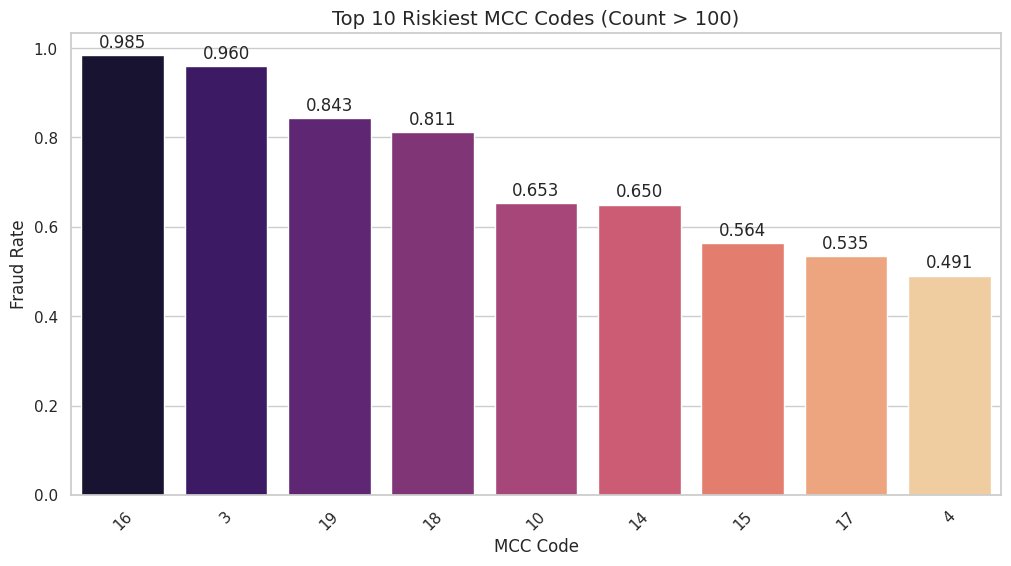

In [ ]:
# 1. Device Flags Analysis
device_flags = ['compromised', 'developer_tools', 'web_rdp_connection']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, flag in enumerate(device_flags):
    # Aggregation
    # Group by the flag column and calculate mean target
    flag_stats = (
        df_train.group_by(flag)
        .agg(pl.col("target").mean().alias("fraud_rate"))
        .sort(flag)
    ).to_pandas()

    # Plotting
    # Fix: assign x variable to hue and set legend=False to avoid FutureWarning
    sns.barplot(data=flag_stats, x=flag, y='fraud_rate', hue=flag, ax=axes[i], palette='Reds', legend=False)
    axes[i].set_title(f'Fraud Rate by {flag}')
    axes[i].set_ylabel('Fraud Rate')
    axes[i].set_xlabel(flag)

    # Add value labels for clarity
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.3f')

plt.tight_layout()
plt.show()

# 2. MCC Analysis
# Calculate count and mean target for each MCC code
mcc_stats = (
    df_train.group_by("mcc_code")
    .agg([
        pl.count("target").alias("count"),
        pl.col("target").mean().alias("fraud_rate")
    ])
    .filter(pl.col("count") > 100)  # Filter for significant volume
    .sort("fraud_rate", descending=True)
    .head(10)  # Top 10 riskiest
)

print("Top 10 Riskiest MCC Codes:")
display(mcc_stats)

# Visualize Top 10 MCCs
plt.figure(figsize=(12, 6))
pdf_mcc = mcc_stats.to_pandas()
sns.barplot(data=pdf_mcc, x='mcc_code', y='fraud_rate', palette='magma', hue='mcc_code', legend=False)

plt.title('Top 10 Riskiest MCC Codes (Count > 100)', fontsize=14)
plt.ylabel('Fraud Rate', fontsize=12)
plt.xlabel('MCC Code', fontsize=12)
plt.xticks(rotation=45)

# Add value labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.3f}',
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()